## Task-D: Collinear features and their effect on linear models

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [165]:
data = pd.read_csv('task_d.csv')

In [166]:
data.shape

(100, 8)

In [167]:
X = data.drop(['target'], axis=1)
Y = data['target']

In [168]:
X

,x,y,z,x*x,2*y,2*z+3*x*x,w
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054
...,...,...,...,...,...,...,...
95,0.358663,-0.207835,0.928390,0.300024,-0.207835,0.382111,1.716476
96,0.358663,-0.417770,0.928390,0.300024,-0.417770,0.382111,1.841269
97,1.141771,-0.417770,0.997724,1.130131,-0.417770,1.137586,0.019860
98,-0.581066,-1.257507,0.096375,-0.604025,-1.257507,-0.531992,0.590582


### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>


1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature

</pre>

#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

In [169]:
#Check Correlation between features
X.corr()

,x,y,z,x*x,2*y,2*z+3*x*x,w
x,1.000000,-0.205926,0.812458,0.997947,-0.205926,0.996252,0.583277
y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790
z,0.812458,-0.602663,1.000000,0.807137,-0.602663,0.847163,0.674486
x*x,0.997947,-0.209289,0.807137,1.000000,-0.209289,0.997457,0.583803
2*y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790
2*z+3*x*x,0.996252,-0.261123,0.847163,0.997457,-0.261123,1.000000,0.606860
w,0.583277,-0.401790,0.674486,0.583803,-0.401790,0.606860,1.000000


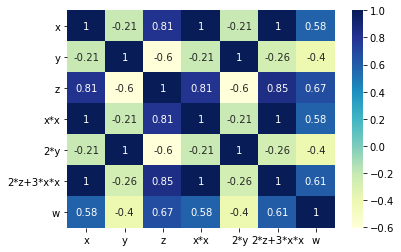

In [170]:
# plotting correlation heatmap
dataplot = sns.heatmap(X.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

In [193]:
#param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold


In [172]:
clf = GridSearchCV(estimator=LogisticRegression(),cv=StratifiedKFold(5), n_jobs=-1,
param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}, verbose=1,scoring='roc_auc')

In [173]:
clf.fit(X,Y)
clf.best_params_

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:   13.5s finished


{'C': 0.001}

In [174]:
best_model = GridSearchCV(estimator=LogisticRegression(),cv=StratifiedKFold(3), n_jobs=-1,
param_grid={'C': [0.001]}, verbose=1,scoring='accuracy')

In [175]:
best_model.fit(X,Y)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001]}, scoring='accuracy', verbose=1)

In [176]:
accuracy_1 = best_model.best_score_

In [177]:
clf = LogisticRegression(C = 0.001)

In [178]:
clf.fit(X,Y)

LogisticRegression(C=0.001)

In [179]:
weights_1 = clf.coef_

In [180]:
X_new = X.add(0.01)
clf = GridSearchCV(estimator=LogisticRegression(),cv=StratifiedKFold(3), n_jobs=-1,
param_grid={'C': [0.001]}, verbose=1,scoring='accuracy')

In [181]:
best_model = clf.fit(X_new,Y)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


In [182]:
accuracy_2 = best_model.best_score_

In [183]:
clf = LogisticRegression(C = 0.001)

In [184]:
clf.fit(X_new,Y)

LogisticRegression(C=0.001)

In [185]:
weights_2 = clf.coef_

In [191]:
#Difference of accuracy scores
accuracy_2-accuracy_1

0.0

In [186]:
#Difference of Weights
li = list(weights_2 - weights_1)

In [187]:
li

[array([ 2.00681030e-07, -2.45869542e-06, -4.10577468e-06,  8.32592054e-07,
        -2.45869541e-06,  2.53565372e-07,  5.21384123e-07])]

In [188]:
li_new = np.argsort(li,axis=1)

In [189]:
final_li = li_new.flatten()[::-1]

In [190]:
#Features with higher change in weights
X.iloc[:,final_li[0:4]].columns

Index(['x*x', 'w', '2*z+3*x*x', 'x'], dtype='object')

In [207]:
#Linear SVM
from sklearn.svm import LinearSVC
clf = GridSearchCV(estimator=LinearSVC(),cv=StratifiedKFold(3), n_jobs=-1,
param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}, verbose=1,scoring='accuracy')

In [208]:
clf.fit(X,Y)
clf.best_params_

Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    1.2s finished


{'C': 0.001}

In [209]:
best_model = GridSearchCV(estimator=LinearSVC(),cv=StratifiedKFold(3), n_jobs=-1,
param_grid={'C': [0.001]}, verbose=1,scoring='accuracy')

In [210]:
best_model.fit(X,Y)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=LinearSVC(), n_jobs=-1, param_grid={'C': [0.001]},
             scoring='accuracy', verbose=1)

In [211]:
accuracy_1 = best_model.best_score_

In [212]:
accuracy_1

1.0

In [213]:
clf = LinearSVC(C = 0.001)
clf.fit(X,Y)

LinearSVC(C=0.001)

In [214]:
weights_1 = clf.coef_

In [216]:
clf = GridSearchCV(estimator=LinearSVC(),cv=StratifiedKFold(3), n_jobs=-1,
param_grid={'C': [0.001]}, verbose=1,scoring='accuracy')

In [217]:
clf.fit(X_new,Y)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=LinearSVC(), n_jobs=-1, param_grid={'C': [0.001]},
             scoring='accuracy', verbose=1)

In [218]:
accuracy_2 = clf.best_score_

In [220]:
clf = LinearSVC(C = 0.001)
clf.fit(X_new,Y)

LinearSVC(C=0.001)

In [221]:
weights_2 = clf.coef_

In [222]:
li = list(weights_2 - weights_1)

In [224]:
#Difference of accuracy
accuracy_2 - accuracy_1

0.0

In [225]:
li_new = np.argsort(li,axis=1)
final_li = li_new.flatten()[::-1]
#Features with higher change in weights
X.iloc[:,final_li[0:4]].columns

Index(['x', 'x*x', '2*z+3*x*x', 'z'], dtype='object')